In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

# make_blobs method generate isotropic gaussian blobs for clustering

# Main cluster
X, y_true = make_blobs(n_samples=400, centers=1, cluster_std=0.60, random_state=0)

# Anomaly Cluster
X_append, y_true_append = make_blobs(n_samples=10,centers=1, cluster_std=5,random_state=0)

print(X.shape, y_true.shape)
print(X_append.shape, y_true_append.shape)

(400, 2) (400,)
(10, 2) (10,)


In [2]:
X = np.vstack([X, X_append])
X
x_df = pd.DataFrame(X)
x_df.head()

,0,1
0,0.897638,4.983635
1,1.076274,4.684806
2,1.016180,4.485270
3,0.966058,4.531278
4,-0.084853,4.517076


In [3]:
# For plotting
X = X[:, ::-1]

In [ ]:
y_true = np.hstack([y_true, [1 for i in y_true_append]])
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

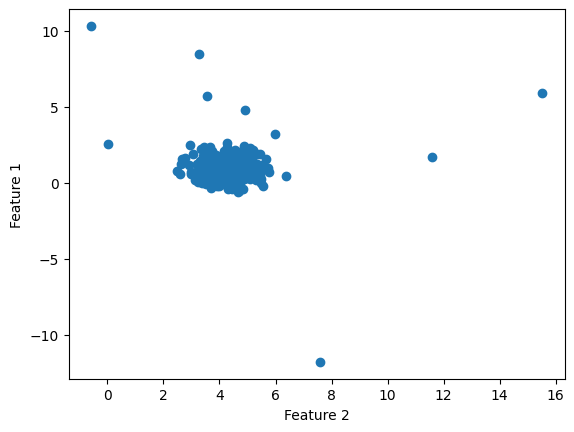

In [ ]:
plt.scatter(X[:,0], X[:,1])
plt.xlabel('Feature 2')
plt.ylabel('Feature 1')
plt.show()

In [6]:
def get_gaussian(X):
    n = X.shape[0]
    summ = np.sum(X, axis=0)
    
    mu = 1 /n * summ
    var = 1/n * np.sum((X - mu)**2, axis=0)
    
    return mu,var
  
mu, sigma2 = get_gaussian(X)
print(mu)
print(sigma2)

[4.30770882 0.9756171 ]
[0.94147734 1.25990509]


In [7]:
def multivariateGaussian(X, mu, sigma2):
    k = len(mu)
    sigma2=np.diag(sigma2)
    X = X - mu.T
    p = 1/((2*np.pi)**(k/2)*(np.linalg.det(sigma2)**0.5))*np.exp(-0.5*np.sum(X@np.linalg.pinv(sigma2)*X,axis=1))
    return p

p = multivariateGaussian(X, mu, sigma2)

In [8]:
sigma2 = np.diag(sigma2)

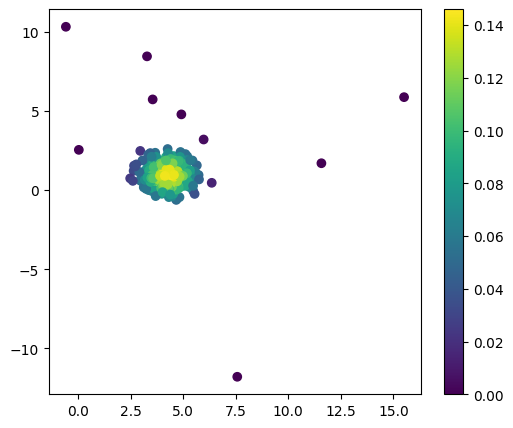

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=p, cmap='viridis')
plt.colorbar();

In [ ]:
print(p.min(), p.max())

1.2623338074896085e-34 0.14606732453094934


(array([ 8.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,  1.,
         0.,  0.,  1.,  2.,  0.,  2.,  0.,  2.,  3.,  0.,  3.,  1.,  1.,
         2.,  1.,  1.,  0.,  1.,  1.,  2.,  1.,  0.,  0.,  0.,  0.,  3.,
         0.,  0.,  3.,  2.,  1.,  2.,  0.,  0.,  1.,  1.,  3.,  1.,  0.,
         1.,  2.,  2.,  3.,  0.,  4.,  0.,  3.,  3.,  1.,  4.,  2.,  1.,
         6.,  1.,  4.,  3.,  1.,  3.,  3.,  3.,  1.,  0.,  1.,  7.,  2.,
         1.,  4.,  1.,  5.,  1.,  2.,  5.,  3.,  2.,  1.,  8.,  4.,  4.,
         1.,  1.,  2.,  3.,  3.,  2.,  4.,  4.,  1.,  0.,  4.,  1.,  8.,
         3.,  3.,  2.,  5.,  4.,  5.,  4.,  4.,  2.,  3.,  4.,  1.,  2.,
         3.,  7.,  6.,  2.,  6.,  5.,  8.,  4.,  2.

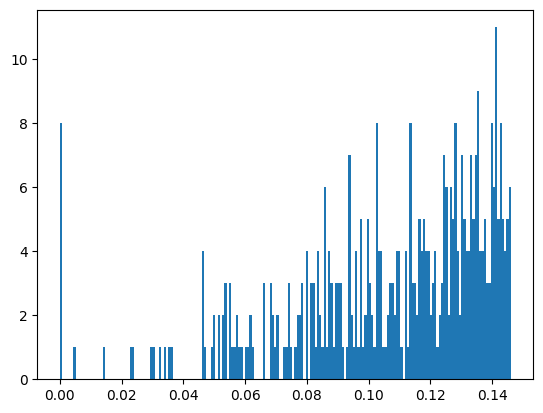

In [ ]:
plt.hist(p, bins = 200)

In [13]:
threshold = 0.01

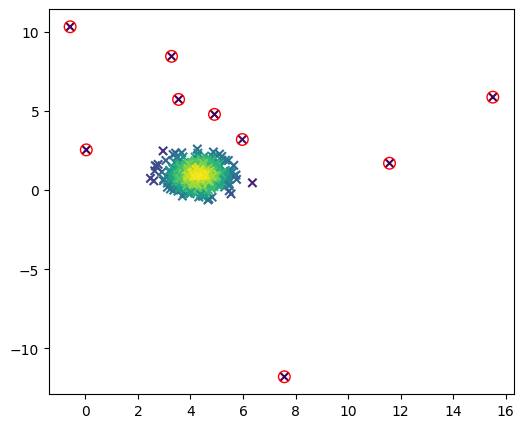

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], marker="x", c=p, cmap='viridis')

# Circling anomalies
outliers = np.nonzero(p<threshold)[0] 
plt.scatter(X[outliers,0], X[outliers,1], marker="o", facecolor="none", edgecolor="r", s=70);

In [18]:
print(X[np.nonzero(p<threshold)[0]])
print("\n")
print(X[p<threshold])

[[  4.91216241   4.7814587 ]
 [ -0.58260207  10.31406003]
 [  7.5718803  -11.788679  ]
 [  5.97215896   3.19558624]
 [ 15.50825332   5.86996   ]
 [  0.03330863   2.54160859]
 [ 11.57515486   1.69648793]
 [  3.27799601   8.44666544]
 [  3.54700129   5.72671217]]


[[  4.91216241   4.7814587 ]
 [ -0.58260207  10.31406003]
 [  7.5718803  -11.788679  ]
 [  5.97215896   3.19558624]
 [ 15.50825332   5.86996   ]
 [  0.03330863   2.54160859]
 [ 11.57515486   1.69648793]
 [  3.27799601   8.44666544]
 [  3.54700129   5.72671217]]


In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score

tr_list = [0.001, 0.01, 0.02, 0.03, 0.1 , 0.2 , 1]
for tr in tr_list:
    pr = precision_score(y_true, p<=tr) 
    rc = recall_score(y_true, p<=tr) 
    f1 = f1_score(y_true, p<=tr) 
    print ("Threshold:" , "{:.3f}".format(tr), " Precision:" , "{:.2f}".format(pr), " Recall: " , "{:.2f}".format(rc) , " F1 Score: ", "{:.2f}".format(f1))


Threshold: 0.001  Precision: 1.00  Recall:  0.80  F1 Score:  0.89
Threshold: 0.010  Precision: 1.00  Recall:  0.90  F1 Score:  0.95
Threshold: 0.020  Precision: 1.00  Recall:  1.00  F1 Score:  1.00
Threshold: 0.030  Precision: 0.77  Recall:  1.00  F1 Score:  0.87
Threshold: 0.100  Precision: 0.07  Recall:  1.00  F1 Score:  0.13
Threshold: 0.200  Precision: 0.02  Recall:  1.00  F1 Score:  0.05
Threshold: 1.000  Precision: 0.02  Recall:  1.00  F1 Score:  0.05


X: (450, 2) 
y_true (450,)
X_train: (315, 2) 
X_test (135, 2)


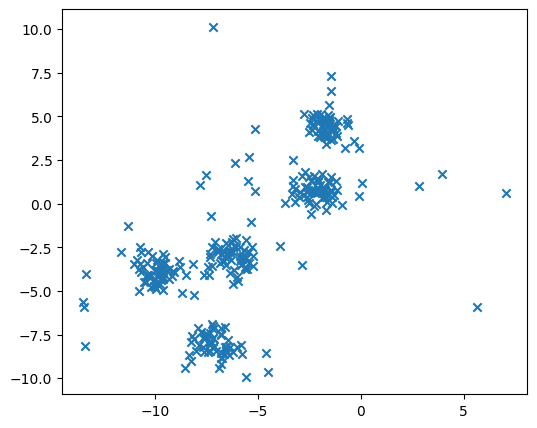

In [22]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

X, y_true = make_blobs(n_samples=400, centers=5, cluster_std=0.60, random_state=1)
X_append, y_true_append = make_blobs(n_samples=50, centers=5, cluster_std=5,random_state=1)

X = np.vstack([X,X_append])
y_true = np.hstack([[0 for _ in y_true], [1 for i in y_true_append]])

print('X:', X.shape, '\ny_true', y_true.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.30, random_state=1, shuffle=True)
print('X_train:', X_train.shape, '\nX_test', X_test.shape)

plt.figure(figsize=(6,5))
plt.scatter(X_train[:,0], X_train[:,1], marker="x")

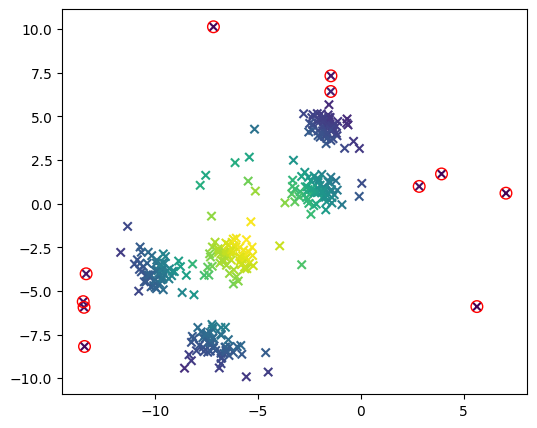

In [23]:
mu, sigma2 = get_gaussian(X_train)
p = multivariateGaussian(X_train, mu, sigma2)

plt.figure(figsize=(6,5))
plt.scatter(X_train[:,0], X_train[:,1], marker="x", c=p, cmap='viridis')
outliers = np.nonzero(p<0.001)[0]
plt.scatter(X_train[outliers,0], X_train[outliers,1], marker="o", facecolor="none", edgecolor="r", s=70);

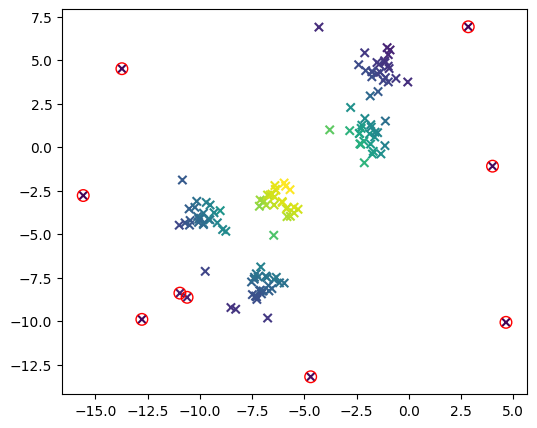

In [24]:
mu, sigma2 = get_gaussian(X_train)
p = multivariateGaussian(X_test, mu, sigma2)

plt.figure(figsize=(6,5))
plt.scatter(X_test[:,0], X_test[:,1], marker="x", c=p, cmap='viridis')
outliers = np.nonzero(p<0.001)[0]
plt.scatter(X_test[outliers,0], X_test[outliers,1], marker="o", facecolor="none", edgecolor="r", s=70);

In [25]:
from sklearn.mixture import GaussianMixture

# Gaussian mixture model probability distribution
gm = GaussianMixture(n_components = 5, covariance_type = 'full', random_state=0)
gm.fit(X_train)

,n_components,5
,covariance_type,'full'
,tol,0.001
,reg_covar,1e-06
,max_iter,100
,n_init,1
,init_params,'kmeans'
,weights_init,None
,means_init,None
,precisions_init,None
,random_state,0


(315,)
-24.67179036061333 -2.8862294523341983


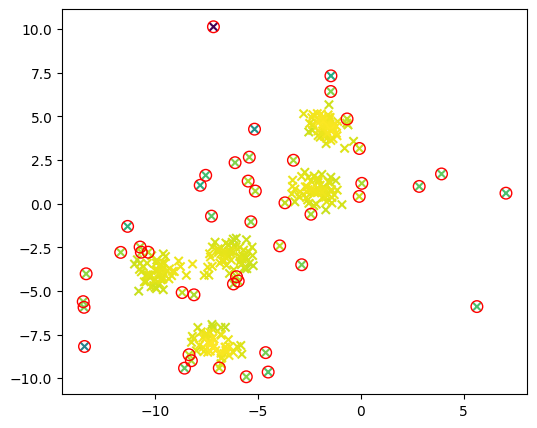

In [27]:
plt.figure(figsize=(6,5))
c = gm.score_samples(X_train)
print(c.shape)
print(c.min(),c.max())

# Returns Log-likelihood of each sample in X under the current model
plt.scatter(X_train[:,0], X_train[:,1], c=gm.score_samples(X_train), cmap='viridis', marker='x')

threshold= -4.8
outliers = np.nonzero(c<threshold)[0]

plt.scatter(X_train[outliers,0], X_train[outliers,1], marker="o", facecolor= "none", edgecolor="r", s=70)
plt.show()

In [ ]:
plt.figure(figsize=(6,5))
c = gm.score_samples(X_test)
plt.scatter(X_test[:,0], X_test[:,1], c=gm.score_samples(X_test), cmap='viridis', marker='x')

threshold= -4.8

outliers = np.nonzero(c<threshold)[0]
plt.scatter(X_test[outliers,0], X_test[outliers,1], marker="o", facecolor= "none", edgecolor="r",s=70)
plt.show()

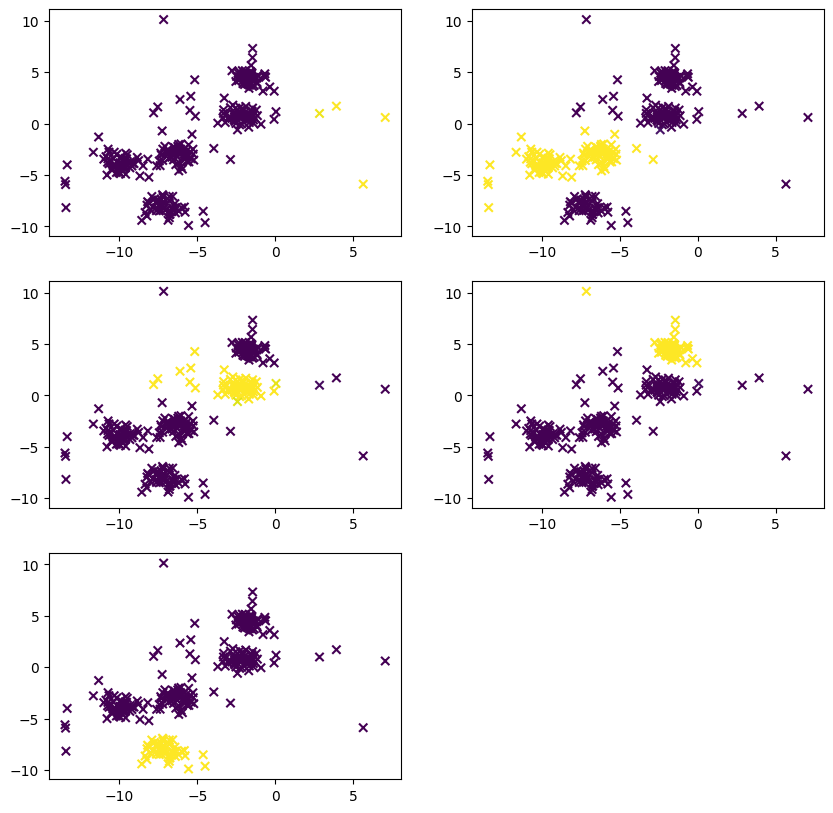

In [28]:
plt.figure(figsize=(10,10))

for i in range(5):
    plt.subplot(3,2,i+1)
    plt.scatter(X_train[:,0],X_train[:,1],c=gm.predict_proba(X_train)[:,i],cmap='viridis',marker='x')

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,
         0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  2.,  1.,  0.,
         0.,  3.,  1.,  4.,  0.,  2.,  1.,  0.,  2.,  6.,  2.,  3.,  5.,
         8., 14., 22., 35., 39., 48., 52., 25., 29.]),
 array([-24.67179036, -24.45393475, -24.23607914, -24.01822353,
        -23.80036792, -23.58251232, -23.36465671, -23.1468011 ,
        -22.92894549, -22.71108988, -22.49323427, -22.27537866,
        -22.05752305, -21.83966744, -21.62181183, -21.40395622,
        -21.18610062, -20.96824501, -20.7503894 , -20.53253379,
        -20.31467818, -20.09682257, -19.87896696, -19.66111135,
        -19.44325574, -19.22540013, -19.00754452, 

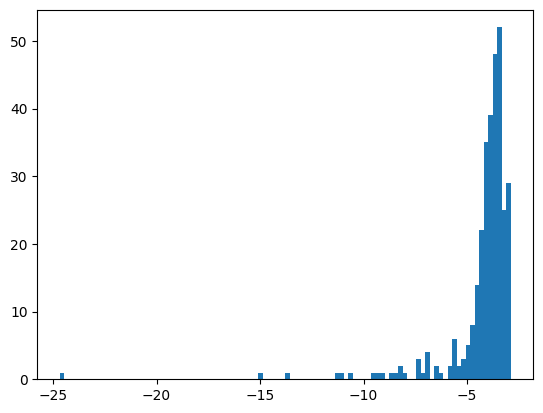

In [29]:
p_gm = gm.score_samples(X_train)
plt.hist(p_gm, bins = 100)

In [30]:
p_gm = gm.score_samples(X_train) 

print ("Method 1: ")

for threshold in [-20, -10, -7, -6, -5]:
   precision = precision_score(y_train, p_gm < threshold) 
   recall = recall_score(y_train, p_gm < tr) 
   print('For threshold of ', threshold,' \t precision: ', '%.3f' % precision,' recall: ', '%.3f' % recall)

print ("\n\nMethod 2: ")

for i in [1, 10, 20, 30, 100 , 120, 130]:
   threshold = sorted(p_gm)[i] 
   precision = precision_score(y_train, p_gm < tr)
   recall = recall_score(y_train, p_gm < threshold)
   print('For i: ', i, '\t  threshold: ', '%.3f'% threshold, ' precision: ', '%.3f' % precision, ' recall: ', '%.3f' % recall)

Method 1: 
For threshold of  -20  	 precision:  1.000  recall:  1.000
For threshold of  -10  	 precision:  1.000  recall:  1.000
For threshold of  -7  	 precision:  0.889  recall:  1.000
For threshold of  -6  	 precision:  0.880  recall:  1.000
For threshold of  -5  	 precision:  0.737  recall:  1.000


Method 2: 
For i:  1 	  threshold:  -15.003  precision:  0.108  recall:  0.029
For i:  10 	  threshold:  -8.492  precision:  0.108  recall:  0.294
For i:  20 	  threshold:  -6.859  precision:  0.108  recall:  0.529
For i:  30 	  threshold:  -5.578  precision:  0.108  recall:  0.706
For i:  100 	  threshold:  -4.106  precision:  0.108  recall:  0.971
For i:  120 	  threshold:  -3.985  precision:  0.108  recall:  0.971
For i:  130 	  threshold:  -3.915  precision:  0.108  recall:  0.971


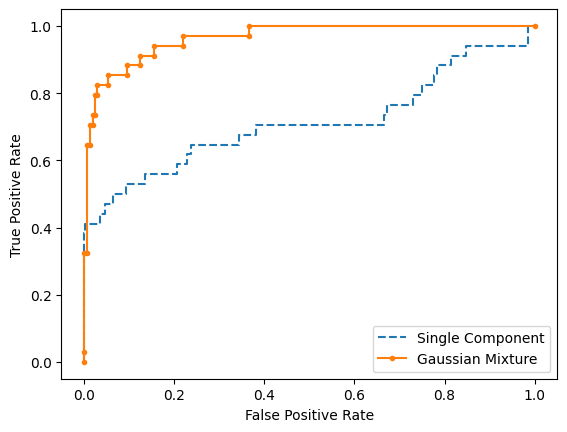

In [31]:
from sklearn.metrics import roc_curve
from sklearn.mixture import GaussianMixture

gm_sf = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
gm_sf.fit(X_train)
p = gm_sf.score_samples(X_train)

fpr_sc, tpr_sc, _ = roc_curve(y_train, -1 * p)
fpr_gm, tpr_gm, _ = roc_curve(y_train, -1 * p_gm)

plt.plot(fpr_sc, tpr_sc, linestyle = '--', label='Single Component')
plt.plot(fpr_gm, tpr_gm, marker='.', label='Gaussian Mixture')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [34]:
from sklearn.metrics import auc

print ("AUC of Single Component", format(auc(fpr_sc, tpr_sc), ".3f"))
print ("AUC of Gaussian Mixture", format(auc(fpr_gm, tpr_gm), ".3f"))

AUC of Single Component 0.712
AUC of Gaussian Mixture 0.964


In [35]:
from sklearn.metrics import roc_auc_score

print("AUC of Single Component", format(roc_auc_score(y_train, -1*p), ".3f"))
print("AUC of Gaussian Mixture", format(roc_auc_score(y_train, -1*p_gm), ".3f"))

AUC of Single Component 0.712
AUC of Gaussian Mixture 0.964


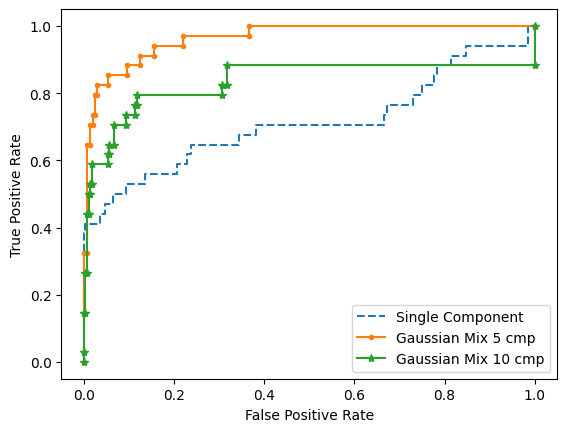

In [36]:
gm2 = GaussianMixture(n_components = 10, covariance_type = 'full', random_state=0)
gm2.fit(X_train)
p_gm2 = gm2.score_samples(X_train)

fpr_sc, tpr_sc, _ = roc_curve(y_train, -1 * p)
fpr_gm, tpr_gm, _ = roc_curve(y_train, -1 * p_gm)
fpr_gm2, tpr_gm2, _ = roc_curve(y_train, -1 * p_gm2)
plt.plot(fpr_sc, tpr_sc, linestyle = '--', label='Single Component')
plt.plot(fpr_gm, tpr_gm, marker='.', label='Gaussian Mix 5 cmp')
plt.plot(fpr_gm2, tpr_gm2, marker='*', label='Gaussian Mix 10 cmp')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()